In [15]:
# TODO: are min and max gate voltages fine at -10 and 10?
# TODO: what is diff of srs 830 vs 810? figure out which to get the phase from
# TODO: how many steps and what delay time for keithley?
# TODO: check initami
# TODO: is the ramp rate correct for ami; i just used the max
# TODO: do i need the [1] after readami inside lockin_iv_ami
# TODO: how long to wait between taking measurements of ami--aka, how many data points needed
# TODO: how to set whether srs is measuring current or voltage or should i just set this manually
# TODO: what voltage should the power supply be drawing at different currents? i.e. how does the resistance of the magnet change

%run lockin_iv_keithley.ipynb
%run lockin_iv_ami.ipynb
%run k2400.ipynb
%run ami420.ipynb
%run srs.ipynb
%run fileio.ipynb
%run hp603.ipynb

In [8]:
# ami420=initami('GPIB0::7::INSTR') # init ami on GPIB addr 8
srxx=initsrs('GPIB0::8::INSTR') # init srs on GPIB addr 20
srxy = srxx
srcurrent = srxx
# srxy=initsrs('GPIB0::10::INSTR') # init srs on GPIB addr 20
# srcurrent=initsrs('GPIB0::11::INSTR') # init srs on GPIB addr 20
k2400=init2400('GPIB1::3::INSTR') # init k2400 on GPIB addr 20

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1199539,C30   Mar 17 2006 09:29:29/A02  /K/J



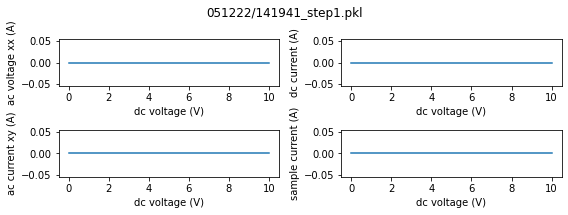

In [16]:
# Sweep gate voltage (from Vmin = -10 V to Vmax = 10 V) and record Rxx, Rxy. Stay at Vg=Vmax. (See Fig 3a from Dean2010). Ramp speed: 0.02 V/sec
delay = 0.05
steps = 51

step1 = lockin_iv_keithley(k2400,srxx,srxy,srcurrent,np.linspace(0,10,steps),delay,1) #how many steps, what delay time
                                                              
# # While Vg=Vmax, sweep the magnetic field from Bmin = 0 T to Bmax = 5 T. We should see a typical QHE plot for Rxx, Rxy.                                                                       
# step2 = lockin_iv_ami(ami420,srsxx,srsxy,srscurrent,0,5,0.032, delay, 2)

# # Go from V = Vmax to V = Vmin while staying at B = Bmax. We expect to see steps in Rxy that correspond to crossing of n=1,0,-1 LLs
# step1 = lockin_iv_keithley(k2400,srxx,srxy,srcurrent,np.linspace(10,-10,steps,delay,1)) #how many steps, what delay time
                                                                       
# # Sweep from B = Bmax to B = 0 while at V = Vmin. We expect to see Rxy(-B) = -Rxy(B), Rxx(-B)=Rxx(B) according to Onsager relations.                                                                 
# step4 = lockin_iv_ami(ami420,srsxx,srsxy,srscurrent,5,0,0.032, delay, 4)

